## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Meta_data_complete_pd = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
Meta_data_complete_pd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
Meta_data_complete_pd.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Checking the number of mice.
MiceCount = len(Meta_data_complete_pd["Mouse ID"].unique())
MiceCount

249

In [5]:

Meta_data_complete_pd['Mouse ID'].value_counts()

g989    13
g296    10
x402    10
g791    10
n364    10
        ..
o848     1
f932     1
x226     1
d133     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# dataframe.loc[(dataframe['column_tofind/locate'])<= be condition ]
Meta_data_complete_pd.loc[Meta_data_complete_pd['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# dataframe.loc[(dataframe['column_tofind/locate'])<= be condition ]
Meta_data_complete_pd.loc[Meta_data_complete_pd.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# dataframe.loc[(dataframe['column_tofind/locate'])<= be condition ]
Meta_data_complete_pd.loc[Meta_data_complete_pd.duplicated(subset=['Mouse ID','Timepoint'])].index

Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df = Meta_data_complete_pd.drop([909, 911, 913, 915, 917])
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
df.loc[df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [11]:
Single_Mice_df = df = Meta_data_complete_pd.drop([909, 911, 913, 915, 917])
Single_Mice_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [12]:
# if any result is true print
#result ==True
#print(result)

In [13]:

micegroup = Meta_data_complete_pd.groupby('Mouse ID')
micegroup.head().count()


Mouse ID              1108
Drug Regimen          1108
Sex                   1108
Age_months            1108
Weight (g)            1108
Timepoint             1108
Tumor Volume (mm3)    1108
Metastatic Sites      1108
dtype: int64

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [15]:
micegroup = Meta_data_complete_pd.groupby('Mouse ID')
micegroup.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Single_Mice_df = df = Meta_data_complete_pd.drop([909, 911, 913, 915, 917])

In [17]:
# Checking the number of mice in the clean DataFrame.
Single_Mice_df = len(Single_Mice_df["Mouse ID"].unique())
Single_Mice_df

249

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
micegroup2 = Meta_data_complete_pd.groupby('Drug Regimen')

miceInfo = micegroup2.agg(["mean", "median", "var", "std", "sem"])['Tumor Volume (mm3)']
miceInfo

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
uniqueMice = df.groupby('Drug Regimen')
drug_count = uniqueMice['Mouse ID'].count()  
print(drug_count)


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


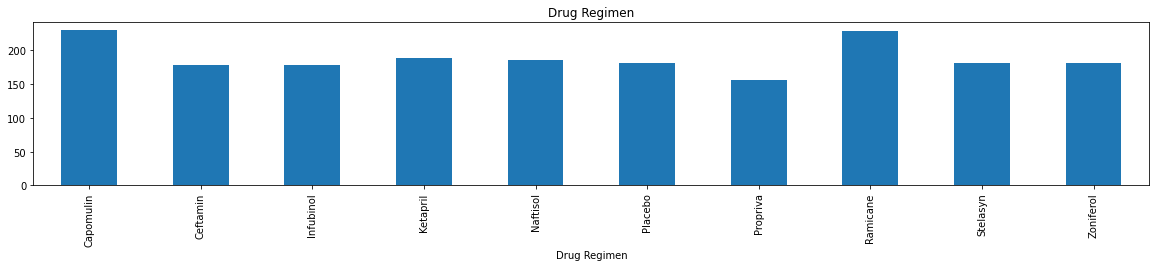

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


drug_count.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Drug Regimen")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Mice')

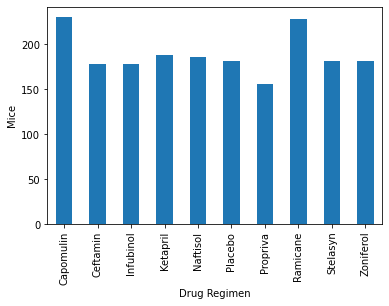

In [22]:
uniqueMice = drug_count.plot(kind='bar') # ********************* This effectively calls a Series.plot() as opposed to a DataFrame.plot() both work

# Set the xlabel and ylabel using class methods
uniqueMice.set_xlabel("Drug Regimen")
uniqueMice.set_ylabel("Mice")


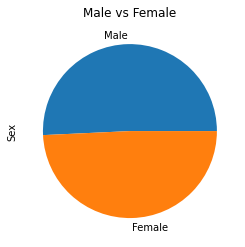

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df['Sex'].value_counts().plot(kind='pie')
plt.title('Male vs Female')
plt.ylabel('Sex')
plt.savefig('pieplot1')
plt.show()

<AxesSubplot:ylabel='None'>

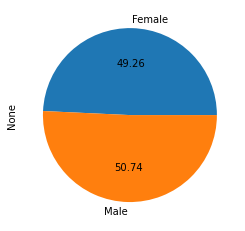

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df.groupby('Sex').size().plot(kind='pie', autopct='%.2f')

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

     # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
     # Determine outliers using upper and lower bounds
df = df.loc[df["Mouse ID"] == "f966",:]
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
60,f966,Capomulin,Male,16,17,0,45.000000,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0


In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

NameError: name 'np' is not defined

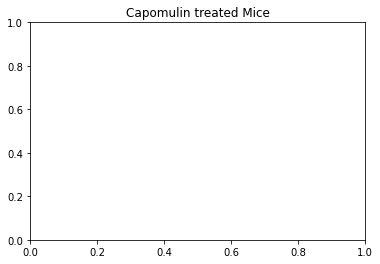

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mice_x = df["Timepoint"]
mice_y = df["Tumor Volume (mm3)"]

plt.title('Capomulin treated Mice')
mice_x = [np.exp()]
mice_x

plt.plot(Timepoint, mice_x)
# Show the graph that we have created
plt.show()



AttributeError: 'DataFrame' object has no attribute 'arange'

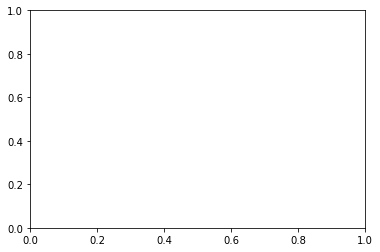

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig, ax = plt.subplots()
ax.errorbar(df.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Weight (g)")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Tumor Volume (mm3)")
ax.set_ylabel("Weight (g)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = df['Weight (g)']
y_values = df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = LinearRegression(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g) ')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

NameError: name 'LinearRegression' is not defined